In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
transaction_df = pd.read_csv('Transactions.csv')
behaviour_df = pd.read_csv('PurchaseBehaviour.csv')

In [5]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction_df.shape

(264836, 8)

In [7]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'],origin='1899-12-30',unit = 'D')

In [9]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [10]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
chip_products = transaction_df[~transaction_df['PROD_NAME'].str.contains('chip', case=False)]
print(chip_products)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
1      2019-05-14          1            1307     348        66   
4      2018-08-18          2            2426    1038       108   
5      2019-05-19          4            4074    2982        57   
7      2019-05-16          4            4196    3539        24   
9      2018-08-18          7            7150    6900        52   
...           ...        ...             ...     ...       ...   
264829 2019-03-16        272          272236  269976        49   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
1                       CCs Nacho Cheese    175g         3        6.3  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3     

In [12]:
words_list = transaction_df['PROD_NAME'].str.split(expand=True).stack()

product_words_df = pd.DataFrame(words_list, columns=['words'])

product_words_df.reset_index(drop=True, inplace=True)

print(product_words_df)

               words
0            Natural
1               Chip
2             Compny
3        SeaSalt175g
4                CCs
...              ...
1359079     Tostitos
1359080       Splash
1359081           Of
1359082         Lime
1359083         175g

[1359084 rows x 1 columns]


In [13]:

product_words_df['SPECIAL'] = product_words_df['words'].str.contains(r'\d')

product_words_df = product_words_df[product_words_df['SPECIAL'] == False]
product_words_df.drop(columns=['SPECIAL'], inplace=True)

print(product_words_df)


            words
0         Natural
1            Chip
2          Compny
4             CCs
5           Nacho
...           ...
1359077  Jalapeno
1359079  Tostitos
1359080    Splash
1359081        Of
1359082      Lime

[1094248 rows x 1 columns]


In [14]:
product_words_df['SPECIAL'] = product_words_df['words'].str.contains(r'[[:punct:]]')

product_words_df = product_words_df[product_words_df['SPECIAL'] == False]

product_words_df.drop(columns=['SPECIAL'], inplace=True)

product_words_df['words'].replace('', pd.NA, inplace=False)

product_words_df.dropna(subset=['words'], inplace=True)

product_words_freq = product_words_df['words'].value_counts().reset_index()
product_words_freq.columns = ['word', 'frequency']
product_words_freq.sort_values(by='frequency', ascending=False, inplace=True)

print(product_words_freq)


C:\Users\Shubh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\strings\accessor.py:1327: FutureWarning: Possible nested set at position 1
  if regex and re.compile(pat).groups:


         word  frequency
0       Chips      49770
1      Kettle      41288
2           &      35565
3      Smiths      28860
4        Salt      27976
..        ...        ...
185  Sunbites       1432
186        Pc       1431
187    Garden       1419
188       NCC       1419
189     Fries       1418

[190 rows x 2 columns]


In [15]:
transaction_df['SALSA'] = transaction_df['PROD_NAME'].str.contains("salsa", case=False)
transaction_df = transaction_df[transaction_df['SALSA'] == False]

transaction_df.drop(columns=['SALSA'], inplace=True)
transaction_df.reset_index(drop=True, inplace=True)

print(transaction_df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246737 2019-03-09        272          272319  270088        89   
246738 2018-08-13        272          272358  270154        74   
246739 2018-11-06        272          272379  270187        51   
246740 2018-12-27        272          272379  270188        42   
246741 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [16]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [17]:
outlier = transaction_df[transaction_df['PROD_QTY'] == 200]
print(outlier)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
64955 2018-08-19        226          226000  226201         4   
64956 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
64955  Dorito Corn Chp     Supreme 380g       200      650.0  
64956  Dorito Corn Chp     Supreme 380g       200      650.0  


In [18]:
transaction_df = transaction_df[transaction_df['LYLTY_CARD_NBR'] != 226000]
transaction_df.reset_index(drop=True, inplace=True)

In [19]:
def packet_size(grp):
    string = grp['PROD_NAME']
    num = []
    for i in string:
        if i.isdigit():
            num.append(i)
    number="".join(num)
    return int(number)

transaction_df['PACKET_SIZE'] = transaction_df.apply(packet_size, axis = 1)

In [20]:
print(transaction_df['PACKET_SIZE'])

0         175
1         175
2         170
3         175
4         150
         ... 
246735    175
246736    175
246737    170
246738    150
246739    175
Name: PACKET_SIZE, Length: 246740, dtype: int64


In [21]:
def brand_name(grp):
    return grp['PROD_NAME'].split()[0]

transaction_df["BRAND"] = transaction_df.apply(brand_name, axis = 1)

In [22]:
print(transaction_df['BRAND'])

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
246735      Kettle
246736    Tostitos
246737     Doritos
246738     Doritos
246739    Tostitos
Name: BRAND, Length: 246740, dtype: object


In [23]:
rep = {'red':'RRD','ww':'WOOLWORTHS','ncc':'NATURAL','snbts':'SUNBITES','infzns':'INFUZIONS','smith':'SMITHS','dorito':'DORITOS','grain':'GRNWVES'}
transaction_df['BRAND'] = transaction_df['BRAND'].str.lower().replace(rep).str.upper()

In [24]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE


In [25]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   PACKET_SIZE     246740 non-null  int64         
 9   BRAND           246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 18.8+ MB


In [26]:
numberOfTransactionsByDate = transaction_df['DATE'].value_counts().reset_index()
numberOfTransactionsByDate.columns = ['date', 'Transactions']
numberOfTransactionsByDate['date'] = pd.to_datetime(numberOfTransactionsByDate['date'])
numberOfTransactionsByDate.sort_values(by='date', inplace=True)

In [27]:
numberOfTransactionsByDate.shape

(364, 2)

(array([17713., 17744., 17775., 17805., 17836., 17866., 17897., 17928.,
        17956., 17987., 18017., 18048., 18078.]),
 [Text(17713.0, 0, '2018-07'),
  Text(17744.0, 0, '2018-08'),
  Text(17775.0, 0, '2018-09'),
  Text(17805.0, 0, '2018-10'),
  Text(17836.0, 0, '2018-11'),
  Text(17866.0, 0, '2018-12'),
  Text(17897.0, 0, '2019-01'),
  Text(17928.0, 0, '2019-02'),
  Text(17956.0, 0, '2019-03'),
  Text(17987.0, 0, '2019-04'),
  Text(18017.0, 0, '2019-05'),
  Text(18048.0, 0, '2019-06'),
  Text(18078.0, 0, '2019-07')])

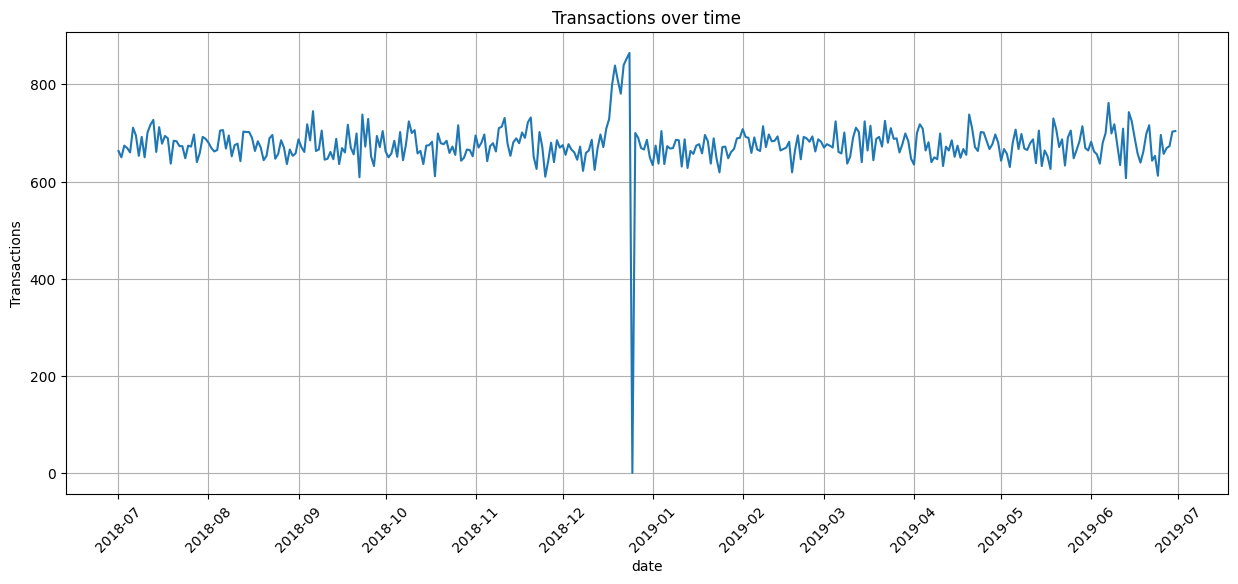

In [28]:

seqOfDates = pd.DataFrame({'date': pd.date_range(start='2018-07-01', end='2019-06-30')})

seqOfDates['date'] = pd.to_datetime(seqOfDates['date'])

transactions_by_day = pd.merge(seqOfDates, numberOfTransactionsByDate, on='date', how='left')

transactions_by_day.fillna({'Transactions':0}, inplace=True)

plt.figure(figsize=(15, 6))
sns.lineplot(data=transactions_by_day, x='date', y='Transactions')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.title('Transactions over time')
plt.grid(True)
plt.xticks(rotation=45) 

In [29]:
December_df = transactions_by_day[transactions_by_day['date'].dt.month==12]

In [30]:
import matplotlib.dates as mdates

datetime64[ns]


(array([17866., 17870., 17874., 17878., 17882., 17886., 17890., 17894.,
        17897.]),
 [Text(17866.0, 0, '2018-12-01'),
  Text(17870.0, 0, '2018-12-05'),
  Text(17874.0, 0, '2018-12-09'),
  Text(17878.0, 0, '2018-12-13'),
  Text(17882.0, 0, '2018-12-17'),
  Text(17886.0, 0, '2018-12-21'),
  Text(17890.0, 0, '2018-12-25'),
  Text(17894.0, 0, '2018-12-29'),
  Text(17897.0, 0, '2019-01-01')])

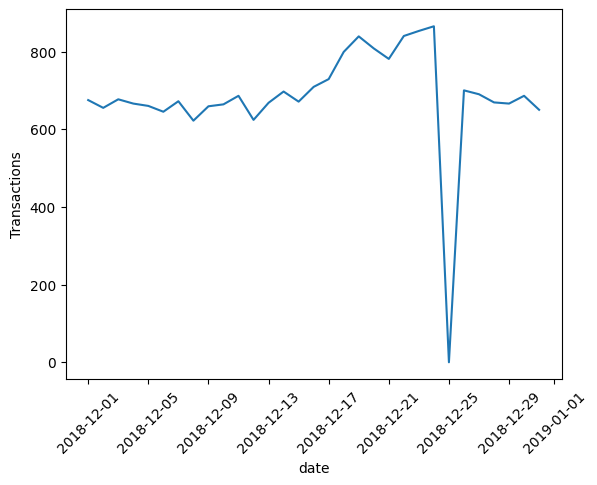

In [31]:
sns.lineplot(data = December_df, x = 'date', y = 'Transactions')
print(December_df['date'].dtype)
plt.xticks(rotation=45) 

#### Spike in no. of transaction in days leading to christmas. No transactions on Chritmas day as the shops remains closed.

In [32]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE


Text(0.5, 1.0, 'Packet Size Distribution')

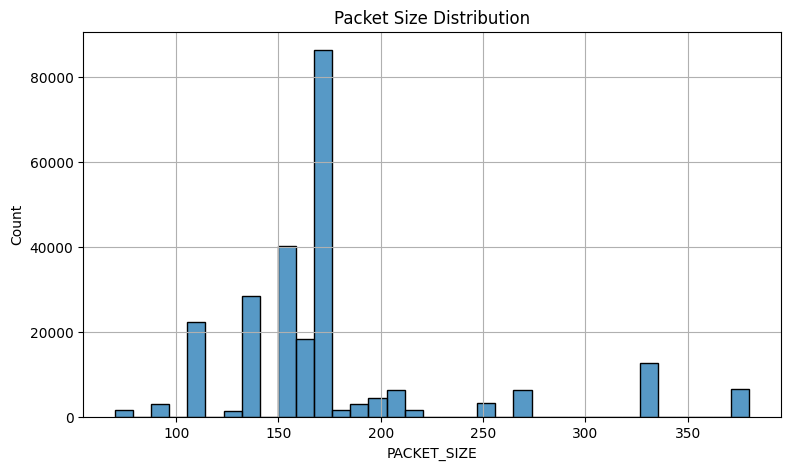

In [33]:
plt.figure(figsize=(9, 5))
sns.histplot(data = transaction_df, x = 'PACKET_SIZE', bins = 35)
plt.grid('True')
plt.title('Packet Size Distribution')

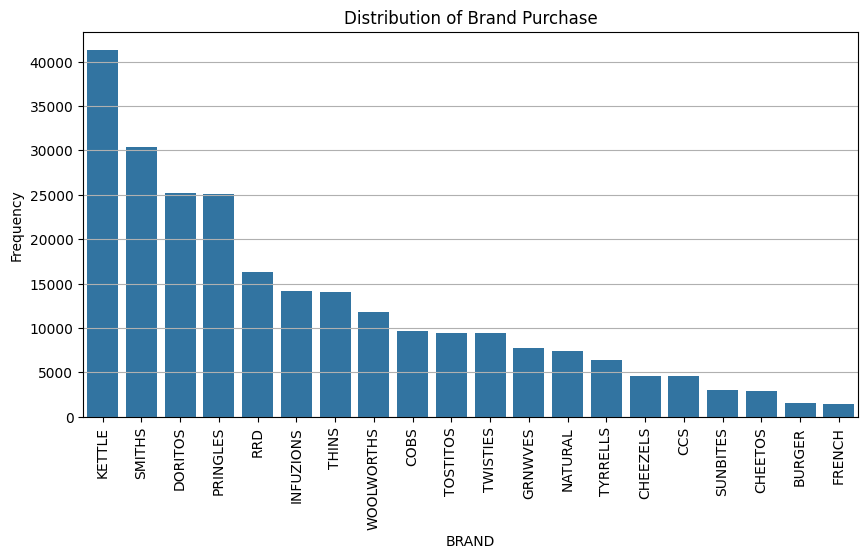

In [34]:
brand_counts = transaction_df['BRAND'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.grid(axis = 'y')
plt.title('Distribution of Brand Purchase')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [35]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKET_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE


In [36]:
behaviour_df.shape

(72637, 3)

In [37]:
transaction_df.shape

(246740, 10)

In [38]:
behaviour_df.duplicated().sum()

0

In [39]:
behaviour_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

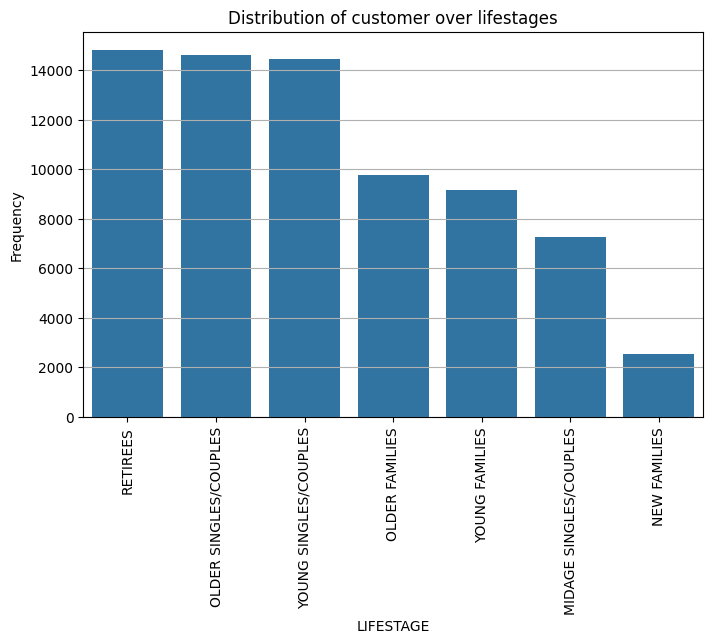

In [40]:
lifestage_counts = behaviour_df['LIFESTAGE'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values)
plt.grid(axis = 'y')
plt.title('Distribution of customer over lifestages')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

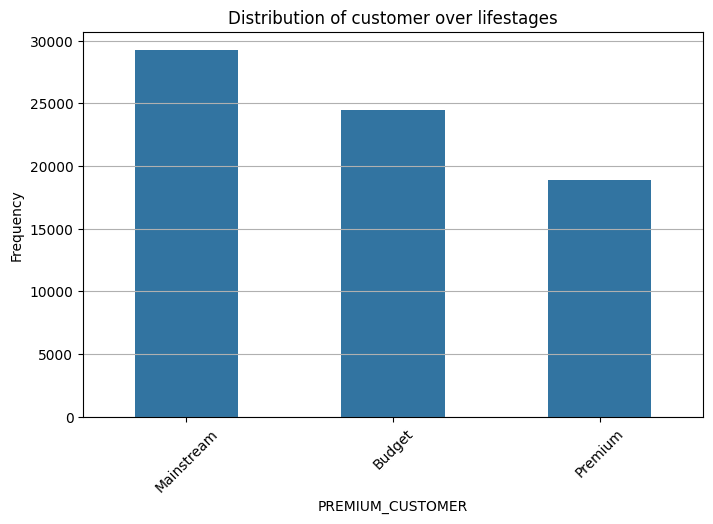

In [41]:
ptypes_counts = behaviour_df['PREMIUM_CUSTOMER'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=ptypes_counts.index, y=ptypes_counts.values, width=.5)
plt.grid(axis = 'y')
plt.title('Distribution of customer over lifestages')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [42]:
df = pd.merge(transaction_df, behaviour_df, how='left', on='LYLTY_CARD_NBR')


In [43]:
df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACKET_SIZE         0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

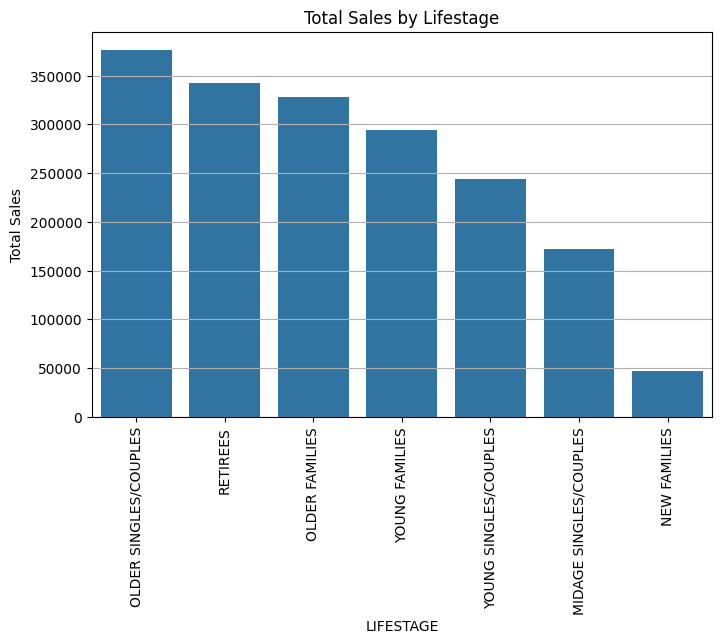

In [44]:
lifestage_df = df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index().sort_values(by = 'TOT_SALES', ascending = False)
plt.figure(figsize=(8, 5))
sns.barplot(data = lifestage_df, x = 'LIFESTAGE', y = 'TOT_SALES')
plt.grid(axis = 'y')
plt.title('Total Sales by Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

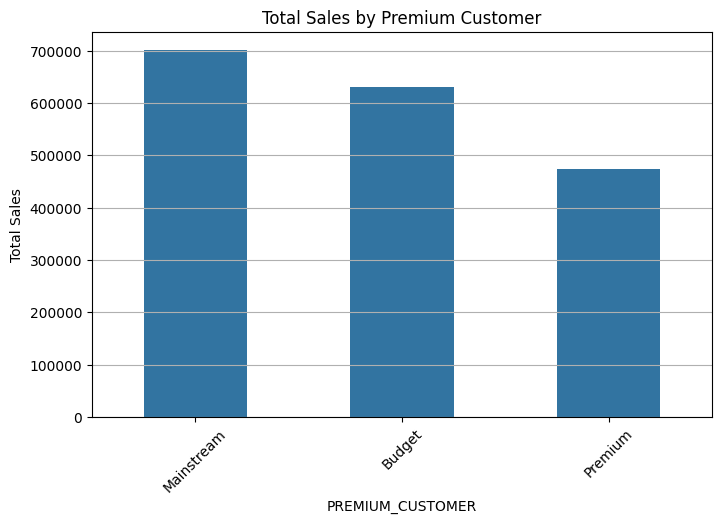

In [45]:
lifestage_df = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index().sort_values(by = 'TOT_SALES', ascending = False)
plt.figure(figsize=(8, 5))
sns.barplot(data = lifestage_df, x = 'PREMIUM_CUSTOMER', y = 'TOT_SALES', width = .5)
plt.grid(axis = 'y')
plt.title('Total Sales by Premium Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

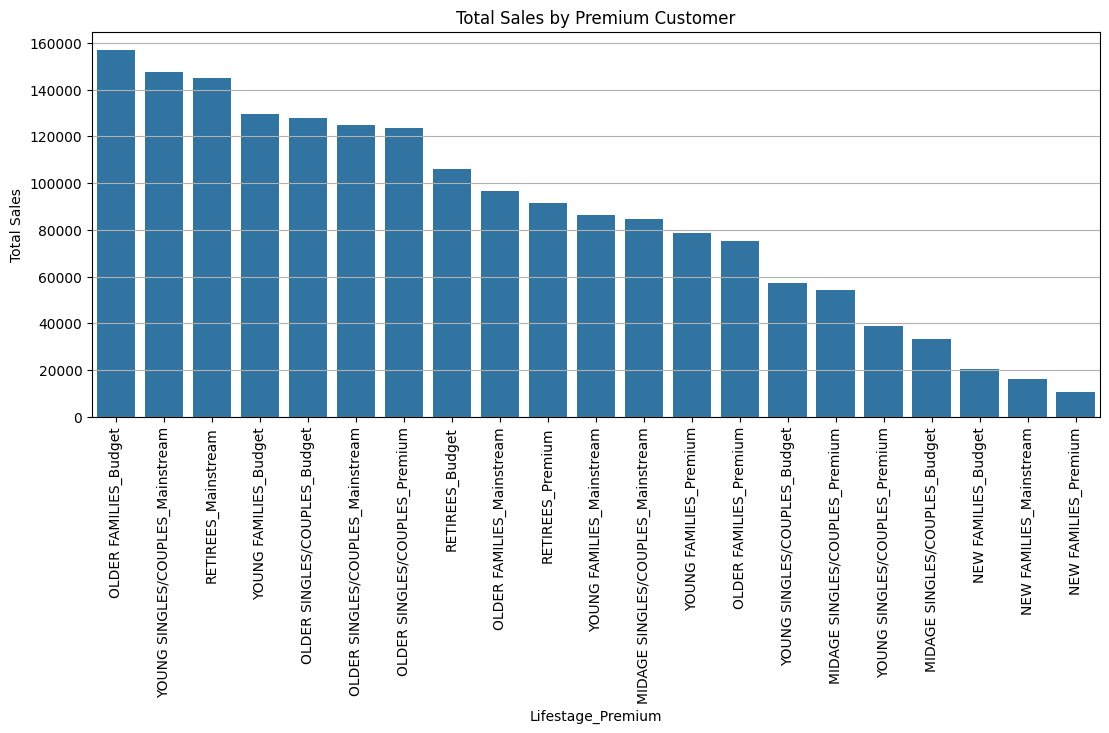

In [46]:
total_sales_by_premium_and_lifestage = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales_by_premium_and_lifestage['Lifestage_Premium'] = total_sales_by_premium_and_lifestage['LIFESTAGE'] + '_' + total_sales_by_premium_and_lifestage['PREMIUM_CUSTOMER']
total_sales_by_premium_and_lifestage = total_sales_by_premium_and_lifestage.sort_values(by='TOT_SALES', ascending=False)
plt.figure(figsize=(13, 5))
sns.barplot(data = total_sales_by_premium_and_lifestage, x = 'Lifestage_Premium', y = 'TOT_SALES')
plt.grid(axis = 'y')
plt.title('Total Sales by Premium Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

#### Most of the sales are made from, Budget - Older Families, Mainstream - young single cou[les, Mainstream - Retirees.

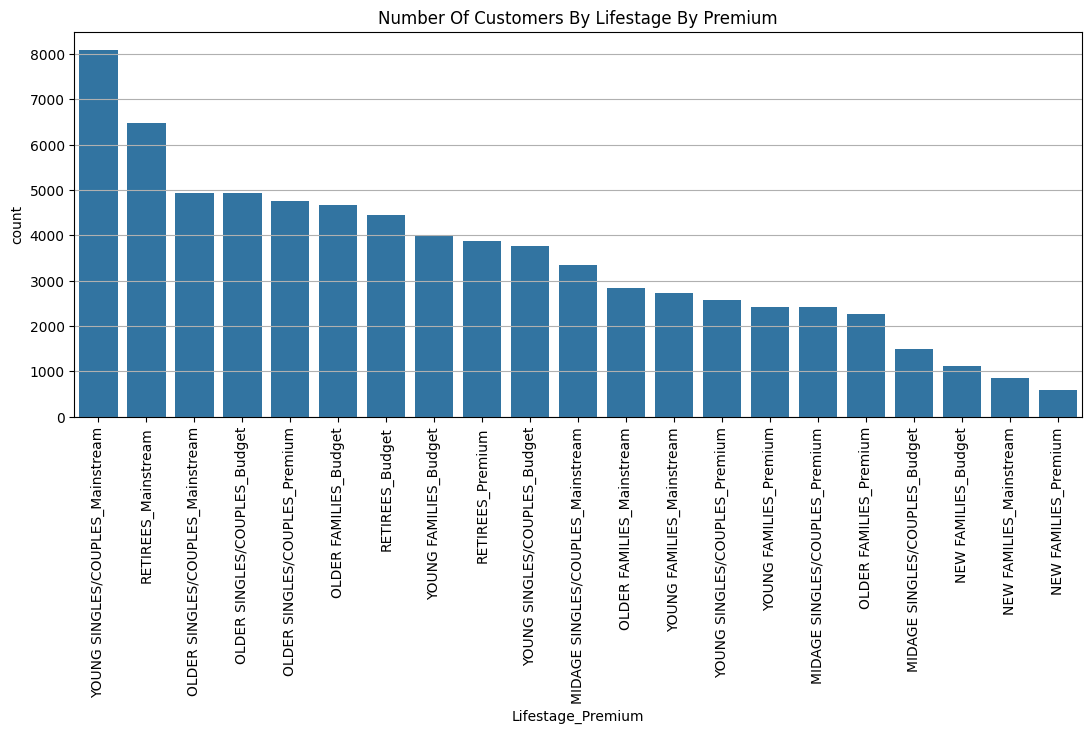

In [47]:
behaviour_df['Lifestage_Premium'] = behaviour_df['LIFESTAGE'] + '_' + behaviour_df['PREMIUM_CUSTOMER']
number_of_customers_by_lifestage_by_premium = behaviour_df['Lifestage_Premium'].value_counts().reset_index()
number_of_customers_by_lifestage_by_premium.columns = ['Lifestage_Premium', 'freq']
plt.figure(figsize=(13, 5))
sns.barplot(data = number_of_customers_by_lifestage_by_premium , x = 'Lifestage_Premium', y = 'freq')

plt.grid(axis = 'y')
plt.title('Number Of Customers By Lifestage By Premium')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [48]:
behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,Lifestage_Premium
0,1000,YOUNG SINGLES/COUPLES,Premium,YOUNG SINGLES/COUPLES_Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream,YOUNG SINGLES/COUPLES_Mainstream
2,1003,YOUNG FAMILIES,Budget,YOUNG FAMILIES_Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream,OLDER SINGLES/COUPLES_Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,MIDAGE SINGLES/COUPLES_Mainstream


In [49]:
df['Lifestage_Premium'] = df['LIFESTAGE'] + '_' + df['PREMIUM_CUSTOMER']

In [50]:
average_no_of_units = df.groupby('Lifestage_Premium')['PROD_QTY'].mean().reset_index()
average_no_of_units = average_no_of_units.sort_values(by = 'PROD_QTY', ascending = False)

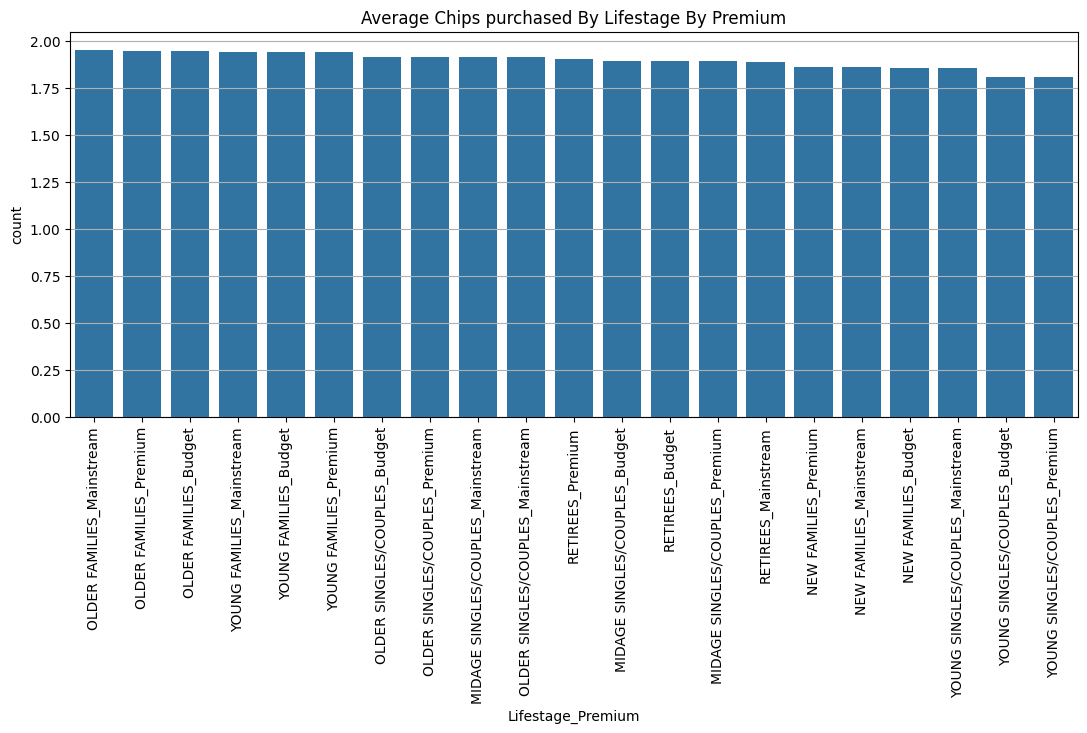

In [51]:
plt.figure(figsize=(13, 5))
sns.barplot(data = average_no_of_units , x = 'Lifestage_Premium', y = 'PROD_QTY')

plt.grid(axis = 'y')
plt.title('Average Chips purchased By Lifestage By Premium')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [52]:
df['UNIT_PRICE'] = df['TOT_SALES']/df['PROD_QTY']

In [53]:
average_unit_price = df.groupby('Lifestage_Premium')['UNIT_PRICE'].mean().reset_index()
average_unit_price = average_unit_price.sort_values(by = 'UNIT_PRICE', ascending = False)

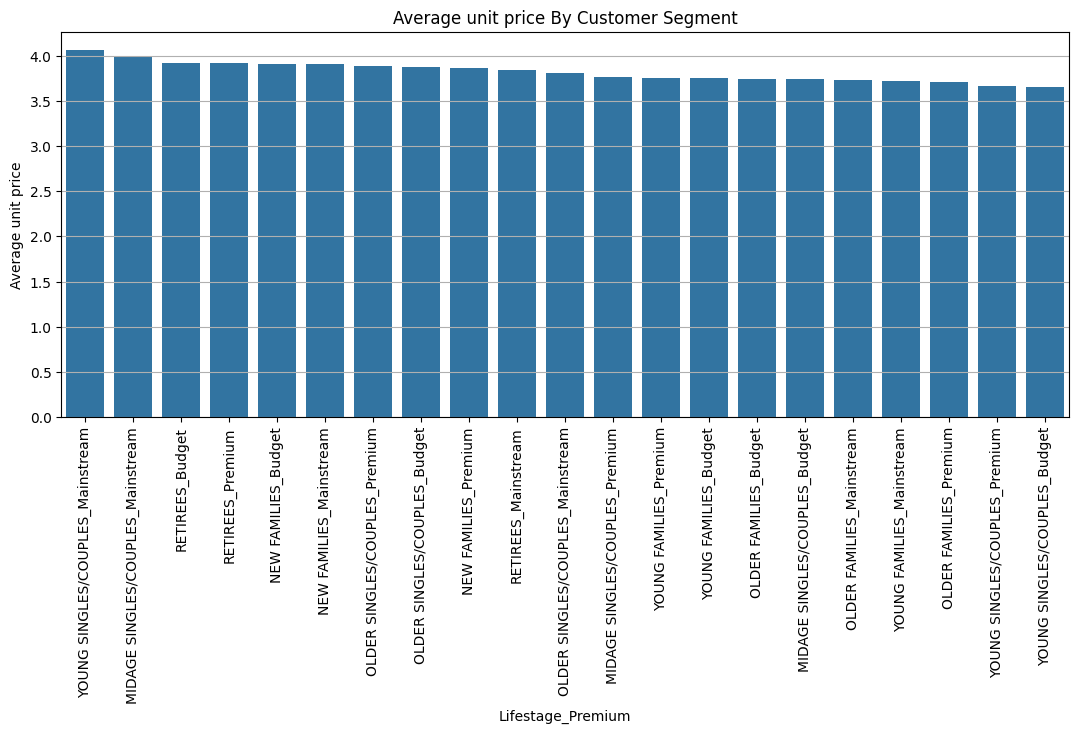

In [54]:
plt.figure(figsize=(13, 5))
sns.barplot(data = average_unit_price , x = 'Lifestage_Premium', y = 'UNIT_PRICE')

plt.grid(axis = 'y')
plt.title('Average unit price By Customer Segment')
plt.ylabel('Average unit price')
plt.xticks(rotation=90)
plt.show()

#### Performing independent T-tests
#### N-hypothesis as Mainstream Young singles/couples do not spend more average price per unit than other.

In [55]:
data1 = list(df[(df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (df['PREMIUM_CUSTOMER'] == 'Mainstream')]["UNIT_PRICE"])
data2 = list(df[(df['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]))  & (df['PREMIUM_CUSTOMER'] != 'Mainstream')]["UNIT_PRICE"])

In [56]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(data1, data2,equal_var=True)
print('t=%.3f, p=%.3f ' % (stat, p))

t=37.832, p=0.000 


#### p<0.05 so rejecting the null-hypothesis, we can conclude that the unit price for Mainstream young and midage, singles and couples is significantly higher than that for Budget or Premium, young or midage, singles or couples. 

In [57]:
mainstream_young_single_couples = df[df['Lifestage_Premium']=='YOUNG SINGLES/COUPLES_Mainstream']

In [58]:
mainstream_young_single_couples_brands = mainstream_young_single_couples['BRAND'].value_counts().reset_index()
mainstream_young_single_couples_brands.columns = ['BRAND', 'counts']

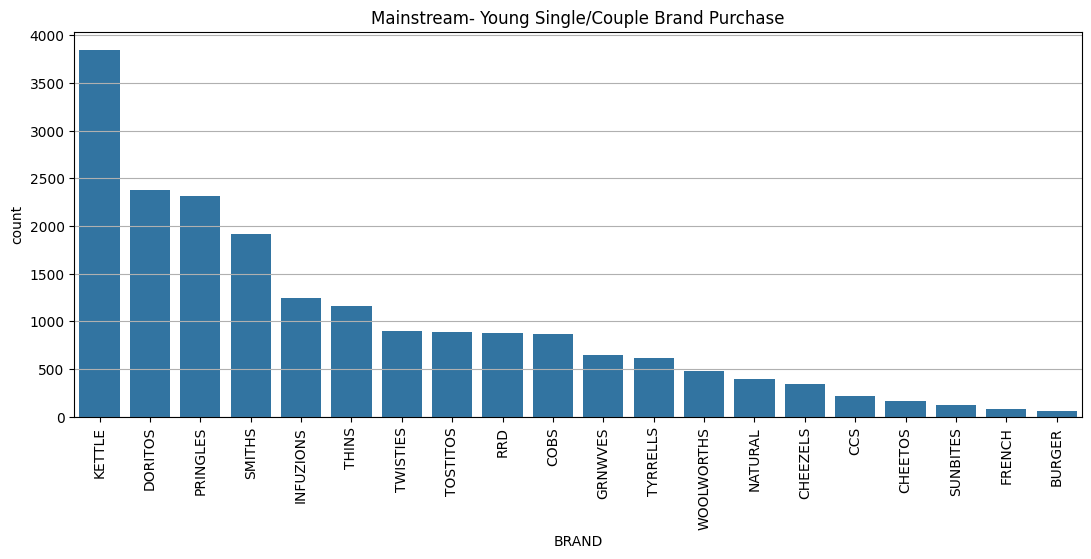

In [59]:
plt.figure(figsize=(13, 5))
sns.barplot(data = mainstream_young_single_couples_brands , x = 'BRAND', y = 'counts')

plt.grid(axis = 'y')
plt.title('Mainstream- Young Single/Couple Brand Purchase')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

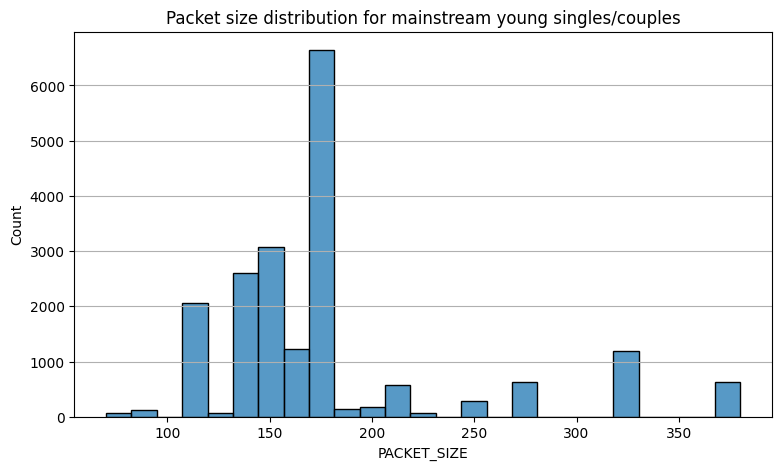

In [60]:
plt.figure(figsize=(9, 5))
sns.histplot(data = mainstream_young_single_couples, x = 'PACKET_SIZE',bins = 25)
plt.title('Packet size distribution for mainstream young singles/couples')
plt.grid(axis ='y')

In [61]:
segment1 = mainstream_young_single_couples
other = df[~(df['Lifestage_Premium']=='YOUNG SINGLES/COUPLES_Mainstream')]

In [62]:
quantity_segment1 = segment1['PROD_QTY'].sum()
segment1_pack = (segment1.groupby('PACKET_SIZE')['PROD_QTY'].sum())/quantity_segment1

In [63]:
quantity_other = other['PROD_QTY'].sum()
other_pack = (other.groupby('PACKET_SIZE')['PROD_QTY'].sum())/quantity_other

In [64]:
segment1_brand = (segment1.groupby('BRAND')['PROD_QTY'].sum())/quantity_segment1
other_brand = (other.groupby('BRAND')['PROD_QTY'].sum())/quantity_other

In [74]:
pack_proportions = pd.merge(segment1_pack, other_pack, left_index=True, right_index=True, suffixes=('_segment1', '_other'))
pack_proportions['affinityToPack'] = pack_proportions['PROD_QTY_segment1']/pack_proportions['PROD_QTY_other']

pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

In [77]:
brand_proportions = pd.merge(segment1_brand, other_brand, left_index=True, right_index=True, suffixes=('_segment1', '_other'))
brand_proportions['affinityToBrand'] = brand_proportions['PROD_QTY_segment1']/brand_proportions['PROD_QTY_other']

brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

<Axes: xlabel='affinityToPack', ylabel='PACKET_SIZE'>

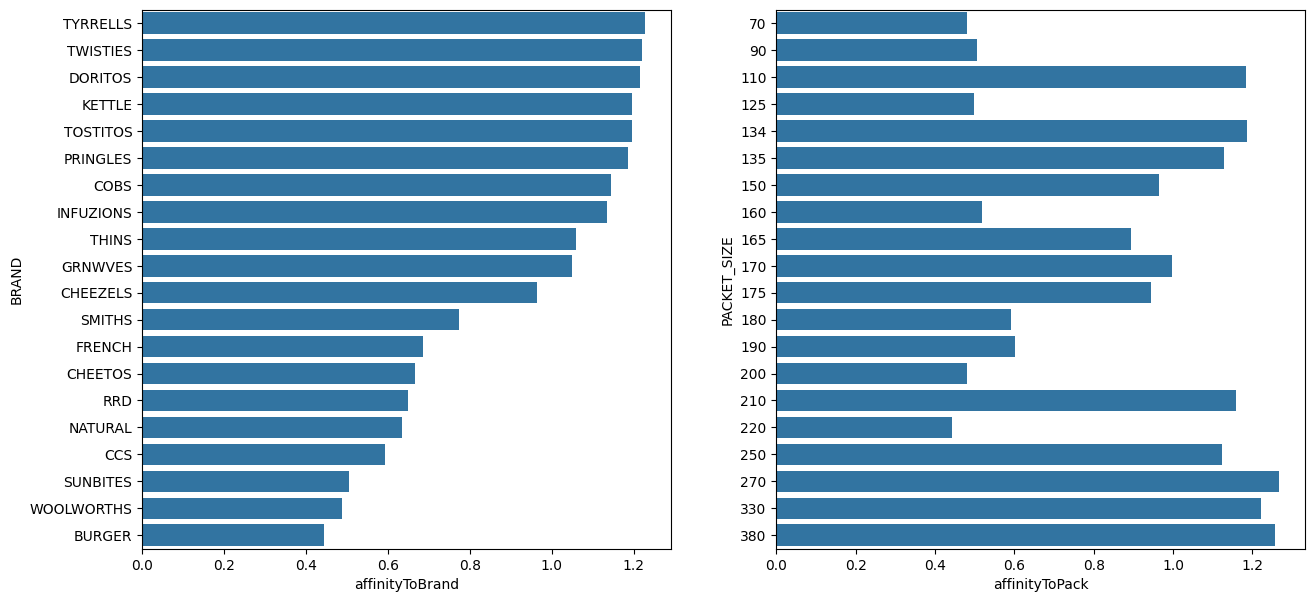

In [78]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.barplot(data = brand_proportions, x = 'affinityToBrand', y = 'BRAND',orient = 'h')

plt.subplot(122)
sns.barplot(data = pack_proportions, x = 'affinityToPack', y = 'PACKET_SIZE', orient = 'h')

#### 1. Top-3 Brands overally are Kettle, Smiths and Doritos
#### 2. Most of the sales has been by Budget- Older Families, Mainstream- Young single/couples, Mainstream- 
#### 3. High sales form mainstream young single/couples and retirees is because number of customer as them are more than others.
#### 4. Mainstream, mid-age, and young singles and couples are also more likely to pay more per packet of chips
#### 5. Mainstream young singles and couples are more likely to buy from brand Tyrrells and packet size 270..

In [79]:
df.to_csv(r'C:\Users\Shubh\OneDrive\Desktop\Projects\Python_DA\data.csv', index=False)


In [80]:
df.shape

(246740, 14)